<a href="https://colab.research.google.com/github/akansha0607/FraudDetection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cmath
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import gridspec


In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/credit_card.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# last rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1981,1524,-0.340622,1.132232,1.291494,0.062313,0.016387,-0.977070,0.723755,-0.074630,-0.396655,...,-0.262948,-0.688785,-0.010937,0.334061,-0.160025,0.071779,0.245128,0.098336,5.35,0.0
1982,1525,-1.842696,1.740641,0.861526,-0.856315,-0.655376,-0.842786,0.198563,0.602764,0.455595,...,-0.213609,-0.400617,0.030013,0.512611,-0.077087,0.286218,0.586012,0.352610,1.00,0.0
1983,1525,-0.480693,0.646091,1.577264,-0.084411,-0.305958,-0.534739,0.860346,-0.028569,-0.800705,...,0.121681,0.175190,0.035986,0.557665,-0.112301,0.337154,-0.015602,0.051504,80.70,0.0
1984,1525,-0.342132,1.091125,1.282729,0.068076,-0.022498,-0.996727,0.676304,-0.042250,-0.312036,...,-0.269850,-0.734148,-0.007354,0.319161,-0.179146,0.073683,0.241932,0.097139,3.59,0.0
1985,1526,-0.854343,1.382948,1.278665,2.914727,-0.183139,-0.349329,0.274566,0.435277,-1.576521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    1983
1.0       2
Name: Class, dtype: int64

This dataset is highly unbalanced

0 --> Normal Transaction

1 --> Fraudulent Transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(1983, 31)
(2, 31)


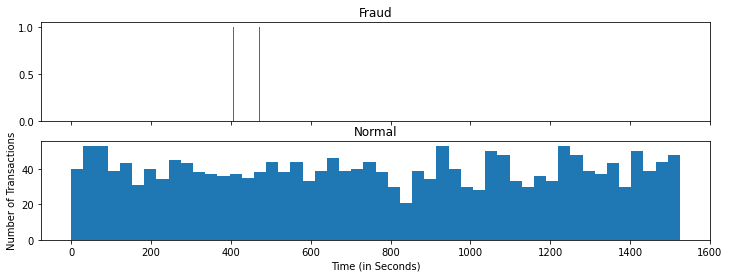

In [ ]:
f, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

axis1.hist(credit_card_data.Time[credit_card_data.Class == 1], bins = bins)
axis1.set_title('Fraud')

axis2.hist(credit_card_data.Time[credit_card_data.Class == 0], bins = bins)
axis2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    1983.000000
mean       68.404892
std       241.572682
min         0.000000
25%         4.950000
50%        15.090000
75%        63.285000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

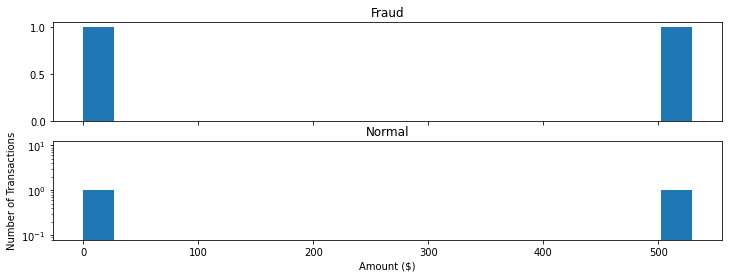

In [ ]:
f, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))
 
bins = 20

axis1.hist(credit_card_data.Amount[credit_card_data.Class == 1], bins = bins)
axis1.set_title('Fraud')

axis2.hist(credit_card_data.Amount[credit_card_data.Class == 1], bins = bins)
axis2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f47d4a43490>>

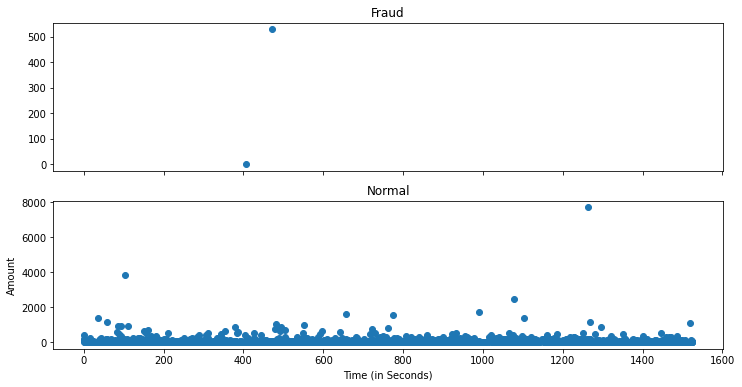

In [ ]:
f, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

axis1.scatter(credit_card_data.Time[credit_card_data.Class == 1], credit_card_data.Amount[credit_card_data.Class == 1])
axis1.set_title('Fraud')

axis2.scatter(credit_card_data.Time[credit_card_data.Class == 0], credit_card_data.Amount[credit_card_data.Class == 0])
axis2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Nothing too useful here because of overlapping.

Next let's take a look at the anonymized features.

In [ ]:
#Select only the anonymized features.
v_features = credit_card_data.iloc[:, 1:29].columns

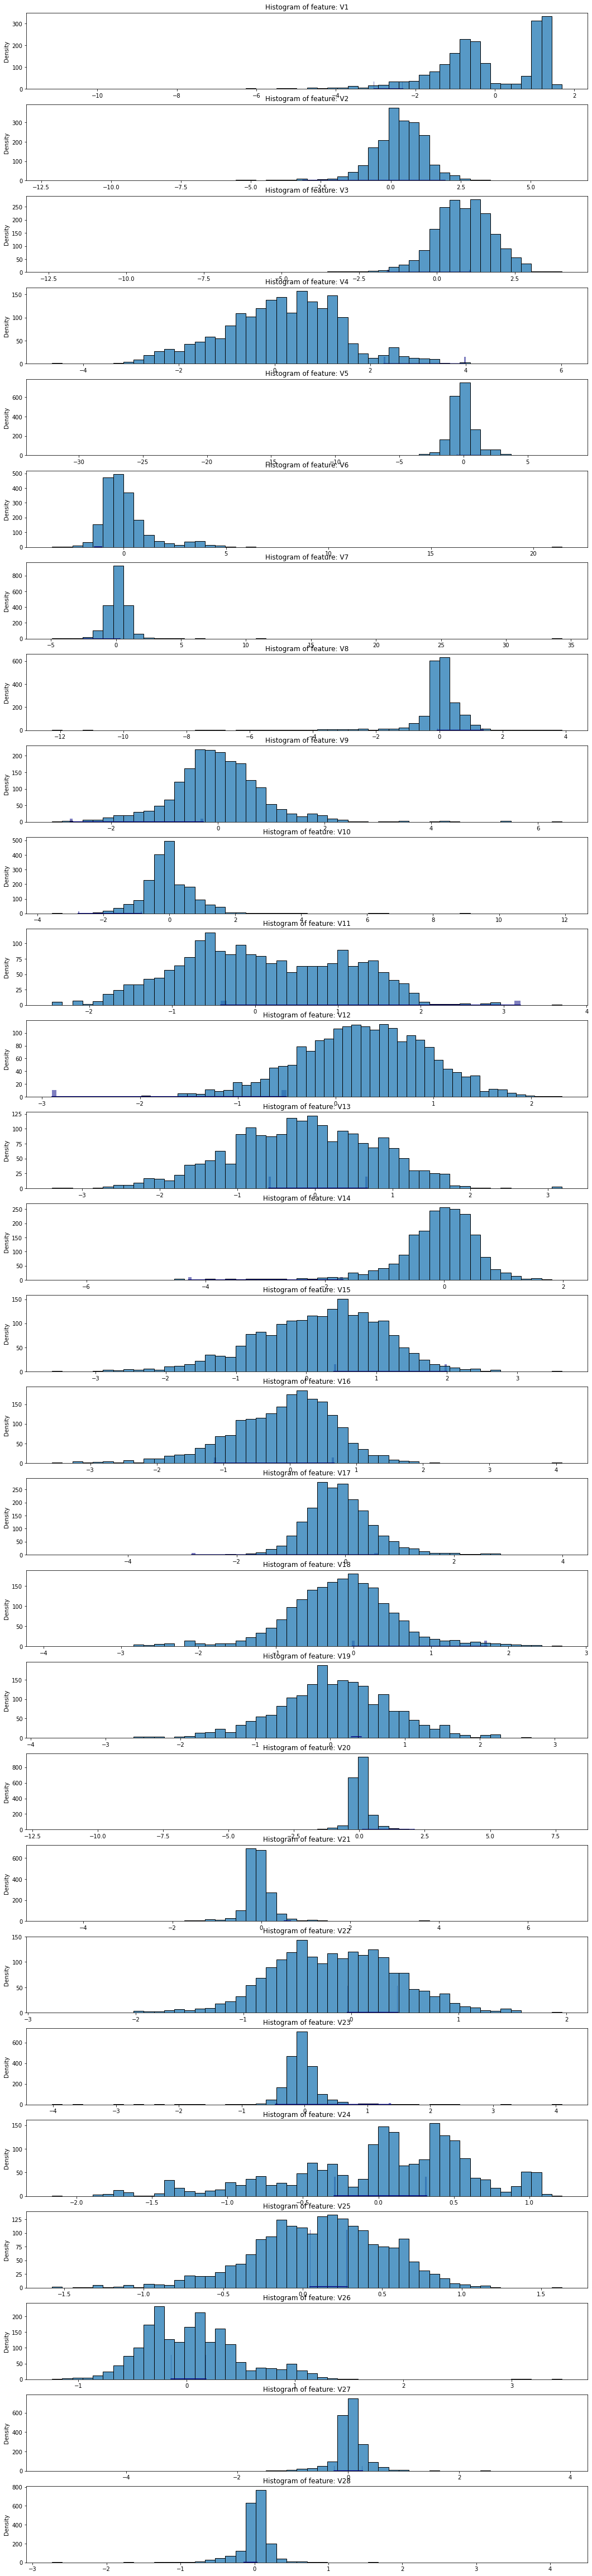

In [ ]:
plt.figure(figsize=(18, 28*3))
gs = gridspec.GridSpec(28, 1)
for i, x in enumerate(credit_card_data[v_features]):
    ax = plt.subplot(gs[i])
    sns.histplot(credit_card_data[x][credit_card_data.Class == 1], bins=50, color="navy", label="100% Equities", kde=True, stat="density", linewidth=0)
    sns.histplot(credit_card_data[x][credit_card_data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(x))
plt.show()

Under Sampling

Build a sample dataset containing similar distribution of Normal Transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 56

In [ ]:
legit_sample = legit.sample(n=56)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
660,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.98,0.0
250,171,-0.365532,1.006932,1.108304,-0.428694,0.590513,0.105474,0.602926,0.132310,-0.636398,...,-0.250031,-0.663325,-0.189399,-0.845682,-0.055760,0.124845,0.263525,0.099579,0.89,0.0
226,150,-0.399880,1.051966,1.390802,0.093132,-0.007699,-0.717559,0.588095,0.085932,-0.310722,...,-0.224926,-0.573766,0.057041,0.329354,-0.302724,0.083883,0.258834,0.096337,0.89,0.0
698,528,-0.378417,0.751515,1.772256,0.311020,-0.329130,-0.746206,0.719034,-0.081805,-0.152417,...,-0.120891,-0.240394,-0.057803,0.733812,-0.049448,0.207357,0.023386,0.057469,25.41,0.0
1935,1494,0.913351,0.162820,0.778282,2.722810,-0.657400,-0.824999,0.245083,-0.138356,-0.658599,...,0.027785,-0.284201,-0.010595,0.875361,0.278540,-0.117198,-0.036402,0.049627,126.71,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1828,1421,1.212129,0.112034,0.222313,0.669416,-0.425354,-0.667387,-0.174886,0.088308,0.437673,...,-0.291333,-0.936416,0.191703,-0.040030,0.052108,0.133221,-0.024147,0.021525,1.29,0.0
158,99,-0.883996,-0.150765,2.291791,-0.263452,-0.814535,0.955841,0.097631,0.474047,0.139512,...,0.070901,0.051832,0.110298,-0.260629,-0.097549,1.155439,-0.021199,0.062565,142.71,0.0
754,564,0.186118,-0.159358,-1.389222,-2.433996,1.753378,3.593082,-1.582165,-1.903514,-1.314805,...,-1.084401,0.656716,-0.139815,1.036164,0.804413,-0.242090,0.103552,0.276180,48.00,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    56
1.0     2
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,665.107143,-0.196622,0.322247,0.886159,0.059009,-0.183576,-0.073640,0.106869,-0.066971,0.123259,...,0.063644,0.026430,-0.159412,-0.080251,0.057303,0.155440,0.079787,-0.031179,-0.056394,55.574643
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Splitting the data into Features & Targets

In [ ]:
 X = new_dataset.drop(columns='Class', axis=1)
 Y = new_dataset['Class']

In [ ]:
 print(X)

      Time        V1        V2        V3        V4        V5        V6  \
660    499  1.255439  0.307729  0.292700  0.699873 -0.428876 -1.088456   
250    171 -0.365532  1.006932  1.108304 -0.428694  0.590513  0.105474   
226    150 -0.399880  1.051966  1.390802  0.093132 -0.007699 -0.717559   
698    528 -0.378417  0.751515  1.772256  0.311020 -0.329130 -0.746206   
1935  1494  0.913351  0.162820  0.778282  2.722810 -0.657400 -0.824999   
675    511 -0.259961  0.998646  1.437975  0.038031  0.125405 -0.957775   
1085   834  0.956248 -0.639957  1.479889  0.960274 -1.187182  0.808972   
217    143 -2.143458  2.107826  0.213152  1.282217 -0.732558  0.023589   
109     73  1.239048  0.293284  0.086472  1.178277  0.373344  0.325596   
1378  1072 -0.501898  0.200435  1.217419 -0.181981 -0.420186  0.083728   
400    290 -0.695818  0.581773  2.378180  0.063396  0.329119 -0.449865   
481    354  1.135629 -0.173986  0.730692  0.711558 -0.854209 -0.494951   
767    575 -0.572263  0.731748  1.5412

In [ ]:
print(Y)

660     0.0
250     0.0
226     0.0
698     0.0
1935    0.0
675     0.0
1085    0.0
217     0.0
109     0.0
1378    0.0
400     0.0
481     0.0
767     0.0
535     0.0
426     0.0
739     0.0
575     0.0
1623    0.0
1245    0.0
1034    0.0
780     0.0
1262    0.0
1966    0.0
162     0.0
932     0.0
1206    0.0
35      0.0
254     0.0
435     0.0
1651    0.0
471     0.0
662     0.0
948     0.0
1464    0.0
1775    0.0
611     0.0
446     0.0
999     0.0
1704    0.0
1688    0.0
1822    0.0
1094    0.0
1136    0.0
685     0.0
147     0.0
1519    0.0
1817    0.0
263     0.0
83      0.0
1260    0.0
801     0.0
271     0.0
737     0.0
1828    0.0
158     0.0
754     0.0
541     1.0
623     1.0
Name: Class, dtype: float64


Split the data into Training Data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(58, 30) (46, 30) (12, 30)


Model Training 

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# Accuracy on Training Data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training Data : ', training_data_accuracy)

Accuracy on Training Data :  1.0


In [ ]:
# Accuracy on Test Data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test Data : ', test_data_accuracy)

Accuracy on Test Data :  1.0
